# First contact with FITS files

In [1]:
import matplotlib 
matplotlib.use('Agg')

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 


Flexible Image Transport System (FITS) is an standard file format used to image and data storage in astronomy.

If you work in astronomy you will have to manipulate FITS files at some point in your career.
Fortunately, you can also use `astropy` to manipulate those files. 

Here we will focus on showing how to read an image from a FITS file.  We follow the basic FITS tutorial provided [in the astropy tutorial](http://docs.astropy.org/en/stable/generated/examples/io/plot_fits-image.html#sphx-glr-generated-examples-io-plot-fits-image-py).

We won't cover how to read data tables or how to write data to FITS files.

First we download a sample fits file

In [2]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

We will printo the information in the FITS file

- The first column is an integer indicating the **Header Data Unit (HDU)**. 
HDU is the highest level of data storage. Inside you usually find tables or images.
- The second column is the name of that HDU.
- The third column is the type
- The fifth column are the dimensions.
- The sixth column is the data type

In [3]:
fits.info(image_file)

Filename: /Users/forero/.astropy/cache/download/py3/2c9202ae878ecfcb60878ceb63837f5f
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     161   (891, 893)   int16   
  1  er.mask       1 TableHDU        25   1600R x 4C   [F6.2, F6.2, F6.2, F6.2]   


In this example the HDU 0 is name of the HDU. It has two dimensions: (891,893) and stores integer numbers. This is an image. We can extract it as follows

In [4]:
image_data = fits.getdata(image_file, ext=0)

In [5]:
type(image_data) # this is a numpy array

numpy.ndarray

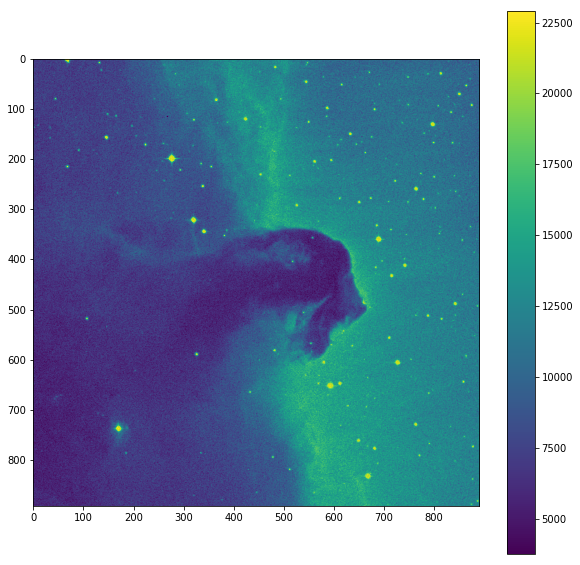

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(image_data)
plt.colorbar()

you can use slicing to plot image subsets

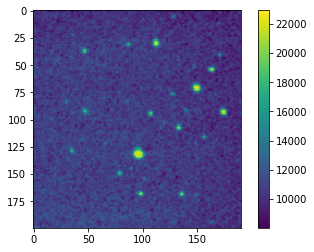

In [7]:
plt.imshow(image_data[:200,700:])
plt.colorbar()

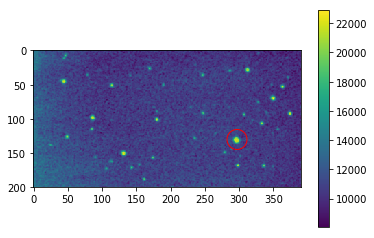

In [8]:
plt.figure()
plt.imshow(image_data[:200,500:])
plt.colorbar()

# You can plot other symbols on top of the image
x = [297]
y = [130]
plt.scatter(x,y, s=400, marker='o', facecolors='none', edgecolors='r')

# Exercise 3.1

Using slicing plot the region of the image with the head of the horse.

# Exercise 3.2

Plot the full image and overplot a red circle around the brightest pixel.
Of course, you have to find the coordinates of the brightest star using python and **not by visual inspection!**

# FITS files from SDSS

In the directory `../data` of this repository we have a couple of files from SDSS. 
One of the stores an image (`frame-g-003919-2-0056.fits.bz2`) and the other stores spectra `spec-1379-53063-0310.fits`.

In the next notebook you will learn how to download SDSS data. In the meantime we will play with those files.

Let's inspect first the image file

In [15]:
SDSS_file = "../data/SDSS/frame-g-003919-2-0056.fits.bz2"
fits.info(SDSS_file)

Filename: ../data/SDSS/frame-g-003919-2-0056.fits.bz2
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In this case we have four HDUs. The image corresponds to the first HDU (see the dimensions!).

In [16]:
SDSS_data = fits.getdata(SDSS_file, ext=0)

/Users/forero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


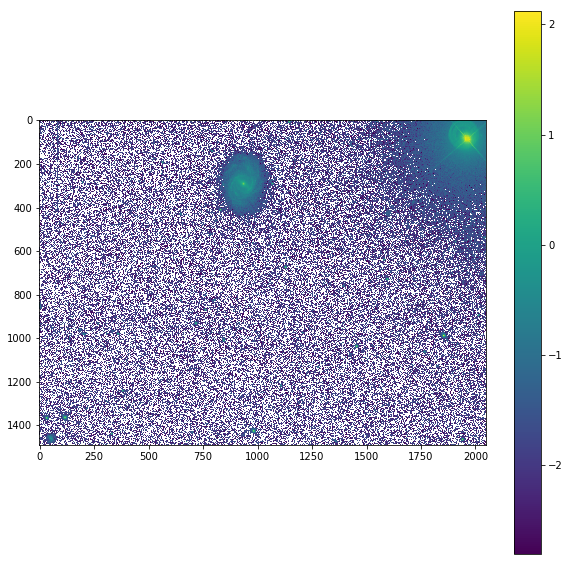

In [17]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(SDSS_data)) # The image is in linear flux units. To see some features we plot it in log-scale
plt.colorbar()

/Users/forero/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log10
  from ipykernel import kernelapp as app


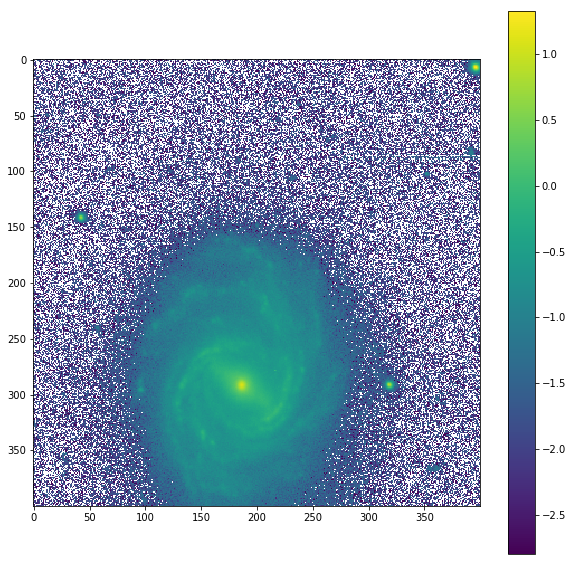

In [18]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(SDSS_data[0:400,750:1150])) # The image is in linear flux units. To see some features we plot it in log-scale
plt.colorbar()

Let's inspect now the spectra file

In [20]:
SDSS_file = "../data/SDSS/spec-1379-53063-0310.fits"
fits.info(SDSS_file)

Filename: ../data/SDSS/spec-1379-53063-0310.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     133   ()      
  1  COADD         1 BinTableHDU     26   3808R x 8C   [E, E, E, J, J, E, E, E]   
  2  SPECOBJ       1 BinTableHDU    262   1R x 126C   [6A, 4A, 16A, 23A, 16A, 8A, E, E, E, J, E, E, J, B, B, B, B, B, B, J, 22A, 19A, 19A, 22A, 19A, I, 3A, 3A, 1A, J, D, D, D, E, E, 19A, 8A, J, J, J, J, K, K, J, J, J, J, J, J, K, K, K, K, I, J, J, J, J, 5J, D, D, 6A, 21A, E, E, E, J, E, 24A, 10J, J, 10E, E, E, E, E, E, E, J, E, E, E, J, E, 5E, E, 10E, 10E, 10E, 5E, 5E, 5E, 5E, 5E, J, J, E, E, E, E, E, E, 25A, 21A, 10A, E, E, E, E, E, E, E, E, J, E, E, J, 1A, 1A, E, E, J, J, 1A, 5E, 5E]   
  3  SPZLINE       1 BinTableHDU     48   29R x 19C   [J, J, J, 13A, D, E, E, E, E, E, E, E, E, E, E, J, J, E, E]   
  4  B1-00025403-00025401-00025402    1 BinTableHDU    139   2035R x 7C   [E, E, E, J, E, E, E]   
  5  R1-00025403-00025401-00025402    1 BinTa

Here we have 6 HDUs. Look at the name of each HDU. `COADD` is the HDU that we need

In [21]:
SDSS_data = fits.getdata(SDSS_file, ext=1)

In [22]:
SDSS_data

FITS_rec([(50.874332, 3.5820999, 0.015997987, 0, 0, 1.2537431, 18.965096, 54.00779),
       (57.513275, 3.5822001, 0.015762132, 0, 0, 1.2534989, 13.727366, 59.60799),
       (69.495064, 3.5822999, 0.014705068, 0, 0, 1.2532547, 13.948431, 64.477501),
       ...,
       (220.67738, 3.9626, 0.011592147, 0, 0, 0.6516189, 2.5678709, 216.36646),
       (215.26912, 3.9626999, 0.011552368, 0, 0, 0.6513961, 3.3582566, 216.33578),
       (220.03197, 3.9628, 0.011591158, 0, 0, 0.65117323, 3.8935299, 216.30508)], 
      dtype=(numpy.record, [('flux', '>f4'), ('loglam', '>f4'), ('ivar', '>f4'), ('and_mask', '>i4'), ('or_mask', '>i4'), ('wdisp', '>f4'), ('sky', '>f4'), ('model', '>f4')]))

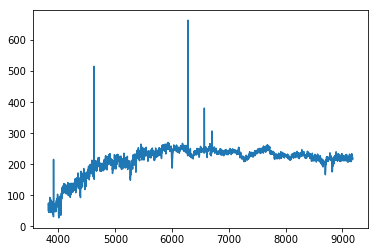

In [23]:
# Here comes the spectrum
plt.plot(10**SDSS_data['loglam'], SDSS_data['FLUX'], )